In [ ]:
# Matplotlib -> library Python utk plotting dan visualisasi data

import numpy as np
import matplotlib.pyplot as plt

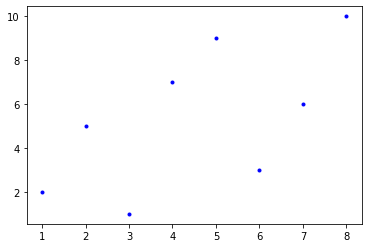

In [ ]:
# Coba plot biasa
# Sediakan data berupa koordinat titiknya

x = [1,2,3,4,5,6,7,8]
y = [2,5,1,7,9,3,6,10]

# Ganti jadi numpy array

x = np.array(x)
y = np.array(y)

# Masuk ke plot
plt.plot(x, y, "b.")
plt.show()

[[0.82142857]
 [1.67857143]]
[[0.82142857]
 [1.67857143]]


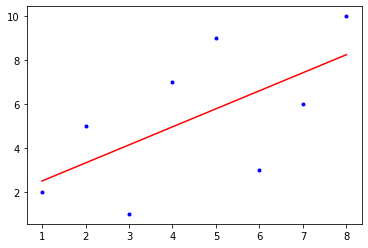

In [ ]:
# Regression -> Menarik garis yang menjadi representasi dari data kita

# Least Square Regression

# y = mx + c

# alpha[0] = m
# alpha[1] = c

# Cari A
A = np.vstack((x, np.ones(len(x)))).T
y_new = y[:, np.newaxis]

# alpha = (AT.A)^-1 * AT * Y

alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y_new)
pinv = np.linalg.pinv(A)
alpha2 = np.dot(pinv, y_new)
print(alpha)
print(alpha2)

plt.plot(x, y, "b.")
plt.plot(x, alpha2[0]*x+alpha2[1], "r")
plt.show()

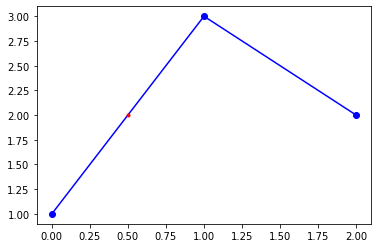

In [ ]:
# Interpolation -> Kita ingin memprediksi data dari range data yang sudah ada

# Linear Interpolation

from scipy.interpolate import interp1d

x = [0,1,2]
y = [1,3,2]

x = np.array(x)
y = np.array(y)

# f -> function linear interpolation
# x_at adalah data di x yang mau diprediksi

x_at = 0.5
f = interp1d(x, y)

# return y_at
y_at = f(x_at)

plt.plot(x, y, "-ob")
plt.plot(x_at, y_at, "r.")
plt.show()

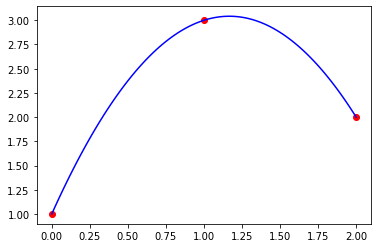

In [ ]:
# Linear Interpolation

from scipy.interpolate import CubicSpline

x = [0,1,2]
y = [1,3,2]

x = np.array(x)
y = np.array(y)

# f -> function cubic spline interpolation

f = CubicSpline(x, y)

# Find new x dan y
x_new = np.linspace(0,2,100)
y_new = f(x_new)

plt.plot(x, y, "ro")
plt.plot(x_new, y_new, "-b")
plt.show()

In [ ]:
# Newton Polynomial Interpolation

# 1. Difference Table
# 2. Newton Poly

def divided_diff(x,y):
  # Cari panjang y dan tampung ke variabel n
  n = len(y)
  # Coef untuk tampung hasil, diinisialisasi dengan matriks 0
  coef = np.zeros([n,n])
  coef[:, 0] = y

  for i in range(1,n):
    for j in range(n-i):
      coef[j][i] = (coef[j+1][i-1] - coef[j][i-1]) / (x[j+i] - x[j])
  return coef

def newton_poly(coef, x_data, x):
  # Mencari Newton Polynomial di titik x
  n = len(x_data)
  p = coef[n]

  for i in range(1, n+1):
    p = coef[n-1] + (x - x_data[n-i])*p
  return p

In [ ]:
x = [-5,-1,0,2]
y = [-2,6,1,3]

x = np.array(x)
y = np.array(y)

# Ambil divided coef
a_s = divided_diff(x,y)[0, :]

# Evaluate point-point dari data yang baru
x_new2 = np.arange(-5, 2.1, 0.1)

# Panggil fungsi Newton Poly
y_new2 = newton_poly(a_s, x, x_new2)

plt.plot(x,y,"bo")
plt.plot(x_new2, y_new2)
plt.show()

IndexError: ignored